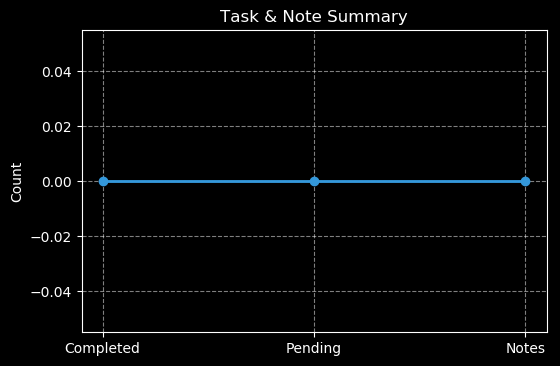

In [2]:
# To-Do Application
import tkinter as tk
from tkinter import ttk, messagebox, filedialog
from datetime import datetime, timedelta
import calendar
import json
import os
from tkcalendar import DateEntry
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

plt.style.use('dark_background')  # Dark style for charts

class TodoApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Smart To-Do Manager")
        self.root.geometry("1000x650")

        self.tasks = []
        self.notes = []
        self.tags = []
        self.current_date = datetime.now()

        self.theme_colors = {
           "bg": "#ECFADC",      
           "fg": "#252525",      
           "nav": "#5b744b",     
           "btn": "#9FD4A3"      
        }

        self.setup_ui()
        self.load_data()

    def clear_content(self):
        for widget in self.content_frame.winfo_children():
            widget.destroy()

    def load_data(self):
        if os.path.exists("tasks.json"):
            with open("tasks.json", "r") as f:
                self.tasks = json.load(f)
        if os.path.exists("notes.json"):
            with open("notes.json", "r") as f:
                self.notes = json.load(f)
        if os.path.exists("tags.json"):
            with open("tags.json", "r") as f:
                self.tags = json.load(f)

    def setup_ui(self):
        self.root.configure(bg=self.theme_colors["bg"])

        self.nav_frame = tk.Frame(self.root, width=220, bg=self.theme_colors["nav"])
        self.nav_frame.pack(side=tk.LEFT, fill=tk.Y)

        nav_title = tk.Label(self.nav_frame, text="Dashboard", bg=self.theme_colors["nav"],
                             fg="white", font=("Segoe UI", 18, "bold"))
        nav_title.pack(pady=20)

        self.sections = {
            "Tasks": self.show_tasks,
            "Notes": self.show_notes,
            "Calendar": self.show_calendar,
            "Statistics": self.show_stats,
            "Timeline": self.show_timeline
        }

        for section, command in self.sections.items():
            btn = tk.Button(self.nav_frame, text=section, width=20, font=("Segoe UI", 11, "bold"),
                            bg=self.theme_colors["btn"], fg=self.theme_colors["fg"],
                            relief="flat", activebackground="#2ecc71", command=command)
            btn.pack(pady=5)

        self.content_frame = tk.Frame(self.root, bg=self.theme_colors["bg"])
        self.content_frame.pack(side=tk.RIGHT, expand=True, fill=tk.BOTH, padx=5, pady=5)

        self.show_tasks()

    def show_tasks(self):
        self.clear_content()
        title = tk.Label(self.content_frame, text="Task Manager", font=("Segoe UI", 20, "bold"),
                         bg=self.theme_colors["bg"], fg=self.theme_colors["fg"])
        title.pack(pady=15)

        self.task_entry = tk.Entry(self.content_frame, width=50, font=("Segoe UI", 13),
                                   bg="#1e1e1e", fg="white", insertbackground="white")
        self.task_entry.pack(pady=5)

        self.date_entry = DateEntry(self.content_frame, width=12, background='black',
                                    foreground='white', borderwidth=2, font=("Segoe UI", 11))
        self.date_entry.pack(pady=5)

        time_frame = tk.Frame(self.content_frame, bg=self.theme_colors["bg"])
        time_frame.pack(pady=5)

        self.hour_var = tk.StringVar(master=self.root)
        self.minute_var = tk.StringVar(master=self.root)
        self.ampm_var = tk.StringVar(master=self.root)


        hours = [f"{i:02d}" for i in range(1, 13)]
        minutes = [f"{i:02d}" for i in range(0, 60)]
        ampm = ["AM", "PM"]

        now = datetime.now()
        self.hour_var.set(now.strftime("%I"))
        self.minute_var.set(now.strftime("%M"))
        self.ampm_var.set(now.strftime("%p"))

        self.hour_cb = ttk.Combobox(time_frame, values=hours, width=3, textvariable=self.hour_var, state="readonly")
        self.minute_cb = ttk.Combobox(time_frame, values=minutes, width=3, textvariable=self.minute_var, state="readonly")
        self.ampm_cb = ttk.Combobox(time_frame, values=ampm, width=3, textvariable=self.ampm_var, state="readonly")

        self.hour_cb.pack(side=tk.LEFT, padx=2)
        self.minute_cb.pack(side=tk.LEFT, padx=2)
        self.ampm_cb.pack(side=tk.LEFT, padx=2)

        tk.Button(self.content_frame, text="Add Task", bg="#27ae60", fg="white", command=self.add_task).pack(pady=8)

        self.task_listbox = tk.Listbox(self.content_frame, width=70, height=12, font=("Segoe UI", 11),
                                       bg="#1e1e1e", fg="white", selectbackground="#444444")
        self.task_listbox.pack(pady=10)

        tk.Button(self.content_frame, text="Mark as Completed", bg="#2980b9", fg="white", command=self.complete_task).pack(pady=3)
        tk.Button(self.content_frame, text="Delete Task", bg="#e74c3c", fg="white", command=self.delete_task).pack(pady=3)

        self.update_listbox()

    def add_task(self):
        task = self.task_entry.get().strip()
        date = self.date_entry.get()
        hour = self.hour_var.get()
        minute = self.minute_var.get()
        ampm = self.ampm_var.get()

        if not (hour and minute and ampm):
            messagebox.showerror("Invalid Time", "Please select a valid time.")
            return

        time = f"{hour}:{minute} {ampm}"
        if task:
            full_task = f"{task} on {date} at {time}"
            self.tasks.append(full_task)
            self.update_listbox()
            self.save_data()

        self.task_entry.delete(0, tk.END)
        now = datetime.now()
        self.hour_cb.set(now.strftime("%I"))
        self.minute_cb.set(now.strftime("%M"))
        self.ampm_cb.set(now.strftime("%p"))

    def complete_task(self):
        selected = self.task_listbox.curselection()
        if selected:
            index = selected[0]
            if not self.tasks[index].endswith(" ✔"):
                self.tasks[index] += " ✔"
                self.update_listbox()
                self.save_data()

    def delete_task(self):
        selected = self.task_listbox.curselection()
        if selected:
            index = selected[0]
            del self.tasks[index]
            self.update_listbox()
            self.save_data()

    def update_listbox(self):
        if hasattr(self, 'task_listbox'):
            self.task_listbox.delete(0, tk.END)
            for task in self.tasks:
                self.task_listbox.insert(tk.END, task)

    def show_notes(self):
        self.clear_content()
        title = tk.Label(self.content_frame, text="Notes", font=("Segoe UI", 20, "bold"),
                         bg=self.theme_colors["bg"], fg=self.theme_colors["fg"])
        title.pack(pady=15)

        self.note_text = tk.Text(self.content_frame, height=10, width=70, font=("Segoe UI", 12),
                                 bg="#1e1e1e", fg="white", insertbackground="white")
        self.note_text.pack(pady=5)

        tk.Button(self.content_frame, text="Save Note", bg="#27ae60", fg="white", command=self.save_note).pack(pady=5)

        self.notes_listbox = tk.Listbox(self.content_frame, width=70, height=8, font=("Segoe UI", 11),
                                        bg="#1e1e1e", fg="white", selectbackground="#444444")
        self.notes_listbox.pack(pady=10)

        tk.Button(self.content_frame, text="Mark Important", bg="#f39c12", fg="white", command=self.mark_note).pack(pady=3)
        tk.Button(self.content_frame, text="Delete Note", bg="#c0392b", fg="white", command=self.delete_note).pack(pady=3)

        self.update_notes()

    def save_note(self):
        note = self.note_text.get("1.0", tk.END).strip()
        if note:
            self.notes.append(note)
            self.note_text.delete("1.0", tk.END)
            self.update_notes()
            self.save_data()

    def mark_note(self):
        sel = self.notes_listbox.curselection()
        if sel:
            idx = sel[0]
            self.notes[idx] = "[Important] " + self.notes[idx]
            self.update_notes()
            self.save_data()

    def delete_note(self):
        sel = self.notes_listbox.curselection()
        if sel:
            idx = sel[0]
            del self.notes[idx]
            self.update_notes()
            self.save_data()

    def update_notes(self):
        if hasattr(self, 'notes_listbox'):
            self.notes_listbox.delete(0, tk.END)
            for i, note in enumerate(self.notes):
                display = note[:50] + ('...' if len(note) > 50 else '')
                self.notes_listbox.insert(tk.END, f"Note {i+1}: {display}")

    def show_calendar(self):
        self.clear_content()
        self.current_date = getattr(self, 'current_date', datetime.now())

        nav_frame = tk.Frame(self.content_frame, bg=self.theme_colors["bg"])
        nav_frame.pack(pady=5)

        tk.Button(nav_frame, text="◀", font=("Segoe UI", 12, "bold"), command=self.prev_month).grid(row=0, column=0, padx=10)
        self.month_year_label = tk.Label(nav_frame, text="", font=("Segoe UI", 16, "bold"),
                                         bg=self.theme_colors["bg"], fg=self.theme_colors["fg"])
        self.month_year_label.grid(row=0, column=1)
        tk.Button(nav_frame, text="▶", font=("Segoe UI", 12, "bold"), command=self.next_month).grid(row=0, column=2, padx=10)

        self.calendar_frame = tk.Frame(self.content_frame, bg=self.theme_colors["bg"])
        self.calendar_frame.pack(pady=10)
        self.render_calendar()

    def render_calendar(self):
        for widget in self.calendar_frame.winfo_children():
            widget.destroy()

        year = self.current_date.year
        month = self.current_date.month
        self.month_year_label.config(text=f"{calendar.month_name[month]} {year}")

        cal = calendar.monthcalendar(year, month)
        weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

        for idx, day in enumerate(weekdays):
            tk.Label(self.calendar_frame, text=day, width=10, bg="#333333", fg="white", font=("Segoe UI", 10, "bold")).grid(row=0, column=idx)

        today = datetime.today()
        is_current_month = today.year == year and today.month == month

        for row_num, week in enumerate(cal, 1):
            for col_num, day in enumerate(week):
                bg_color = "#1c1c1c" if day != 0 else self.theme_colors["bg"]
                fg_color = "#f0f0f0"
                if is_current_month and day == today.day:
                    bg_color = "#e67e22"
                    fg_color = "white"
                tk.Label(self.calendar_frame, text=str(day) if day != 0 else "", width=10, height=2,
                         bg=bg_color, fg=fg_color, relief="solid", bd=1).grid(row=row_num, column=col_num, padx=1, pady=1)

                
    def save_data(self):
        with open("tasks.json", "w") as f:
            json.dump(self.tasks, f)
        with open("notes.json", "w") as f:
            json.dump(self.notes, f)
        with open("tags.json", "w") as f:
            json.dump(self.tags, f)
           
    def prev_month(self):
        self.current_date = self.current_date.replace(day=1) - timedelta(days=1)
        self.render_calendar()

    def next_month(self):
        next_month = self.current_date.replace(day=28) + timedelta(days=4)
        self.current_date = next_month.replace(day=1)
        self.render_calendar()

    def show_stats(self):
        self.clear_content()

        title = tk.Label(self.content_frame, text="Statistics", font=("Segoe UI", 20, "bold"),
                         bg=self.theme_colors["bg"], fg=self.theme_colors["fg"])
        title.pack(pady=15)

        completed = sum(["✔" in task for task in self.tasks])
        pending = len(self.tasks) - completed
        notes_count = len(self.notes)

        labels = ["Completed", "Pending", "Notes"]
        values = [completed, pending, notes_count]
        x = list(range(len(labels)))

        fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
        ax.fill_between(x, values, color="#5dade2", alpha=0.7)
        ax.plot(x, values, color="#3498db", marker='o', linewidth=2)
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.set_ylabel("Count")
        ax.set_title("Task & Note Summary")
        ax.grid(True, linestyle='--', alpha=0.5)

        canvas = FigureCanvasTkAgg(fig, master=self.content_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(pady=20)

    def show_timeline(self):
        self.clear_content()
        title = tk.Label(self.content_frame, text="Timeline", font=("Segoe UI", 20, "bold"),
                         bg=self.theme_colors["bg"], fg=self.theme_colors["fg"])
        title.pack(pady=15)

        sorted_tasks = sorted(self.tasks)
        for task in sorted_tasks:
            overdue = "✔" not in task and datetime.now().strftime("%Y-%m-%d") in task and "at" in task
            color = "red" if overdue else "green" if "✔" in task else self.theme_colors["fg"]
            label = tk.Label(self.content_frame, text=task, font=("Segoe UI", 12), anchor="w",
                             bg=self.theme_colors["bg"], fg=color)
            label.pack(fill='x', padx=20, pady=2)

if __name__ == '__main__':
    root = tk.Tk()
    app = TodoApp(root)
    root.mainloop()
